In [38]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
import sklearn.datasets
import init_utils
import reg_utils
import gc_utils

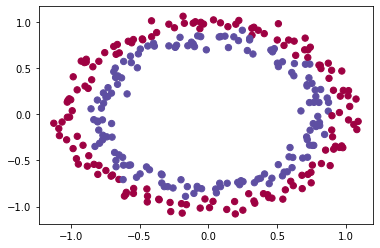

In [39]:
train_X,train_Y,test_X,test_Y = init_utils.load_dataset(is_plot=True)

## 1-初始化参数
### 分别采用全0初始化、随机初始化和抑梯度异常初始化模型

In [40]:
def model(X,Y,a=0.01,iters=15000,isPrint=True,initialization="he",isPlot=True):
    """神经网络模型"""
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],10,5,1]
    
    if initialization == "zeros": # 全0初始化
        params = init_zeros(layers_dims)
    elif initialization == "random": # 随机初始化
        params = init_random(layers_dims)
    elif initialization == "he": # 抑梯度异常初始化
        params = init_he(layers_dims)
    else:
        print("初始化参数错误")
        exit
        
    for i in range(0,iters):
        # 前向传播
        a3, cache = init_utils.forward_propagation(X,params)
        # 计算损失函数
        cost = init_utils.compute_loss(a3,Y)
        # 反向传播
        grads = init_utils.backward_propagation(X,Y,cache)
        # 参数更新
        params = init_utils.update_parameters(params,grads,a)
        
        if i % 1000 == 0:
            costs.append(cost)
            if isPrint:
                print("迭代%d次，误差为%f" % (i,cost))
                
    if isPlot:
        plt.plot(costs)
        plt.xlabel('iters')
        plt.ylabel('cost')
        plt.show()
            
    return params

### (1)全0初始化

In [41]:
def init_zeros(layers_dims):
    """初始化参数为0"""
    params = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        params["W" + str(l)] = np.zeros((layers_dims[l],layers_dims[l-1]))
        params["b" + str(l)] = np.zeros((layers_dims[l],1))
        
    return params

In [42]:
# 测试全0初始化
params = init_zeros([3,2,1])
params["W1"],params["b1"],params["W2"],params["b2"]

(array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[0.],
        [0.]]),
 array([[0., 0.]]),
 array([[0.]]))

迭代0次，误差为0.693147
迭代1000次，误差为0.693147
迭代2000次，误差为0.693147
迭代3000次，误差为0.693147
迭代4000次，误差为0.693147
迭代5000次，误差为0.693147
迭代6000次，误差为0.693147
迭代7000次，误差为0.693147
迭代8000次，误差为0.693147
迭代9000次，误差为0.693147
迭代10000次，误差为0.693147
迭代11000次，误差为0.693147
迭代12000次，误差为0.693147
迭代13000次，误差为0.693147
迭代14000次，误差为0.693147


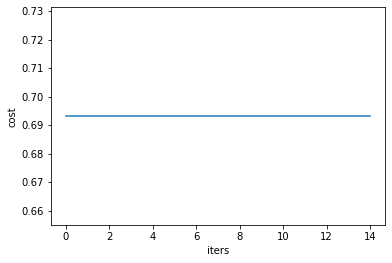

In [43]:
params = model(train_X,train_Y,initialization="zeros")

In [44]:
pre_train = init_utils.predict(train_X,train_Y,params)
pre_test = init_utils.predict(test_X,test_Y,params)

Accuracy: 0.5
Accuracy: 0.5


### 可见0初始化导致神经网络无法打破对称性，无法学习

### (2)随机初始化

In [45]:
def init_random(layers_dims):
    """随机初始化"""
    np.random.seed(1)
    params = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        params["W" + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 10 # 使用十倍缩放
        params["b" + str(l)] = np.zeros((layers_dims[l],1))
        
    return params

In [46]:
# 测试随机初始化
params = init_random([3,2,1])
params["W1"],params["b1"],params["W2"],params["b2"]

(array([[ 16.24345364,  -6.11756414,  -5.28171752],
        [-10.72968622,   8.65407629, -23.01538697]]),
 array([[0.],
        [0.]]),
 array([[17.44811764, -7.61206901]]),
 array([[0.]]))

C:\Users\Administrator\Desktop\DL_NG\2.改善深层神经网络\01-初始化、正则化和梯度校验\init_utils.py:19: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-x))
C:\Users\Administrator\Desktop\DL_NG\2.改善深层神经网络\01-初始化、正则化和梯度校验\init_utils.py:50: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\Administrator\Desktop\DL_NG\2.改善深层神经网络\01-初始化、正则化和梯度校验\init_utils.py:50: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


迭代0次，误差为inf
迭代1000次，误差为1.209589
迭代2000次，误差为0.500098
迭代3000次，误差为0.500295
迭代4000次，误差为0.449533
迭代5000次，误差为0.416643
迭代6000次，误差为0.408501
迭代7000次，误差为0.404900
迭代8000次，误差为0.405513
迭代9000次，误差为0.404532
迭代10000次，误差为0.404939
迭代11000次，误差为0.405050
迭代12000次，误差为0.405707
迭代13000次，误差为0.406247
迭代14000次，误差为0.405257


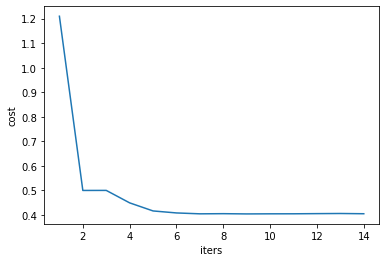

In [47]:
params = model(train_X,train_Y,initialization="random")

In [48]:
pre_train = init_utils.predict(train_X,train_Y,params)
pre_test = init_utils.predict(test_X,test_Y,params)

Accuracy: 0.7866666666666666
Accuracy: 0.76


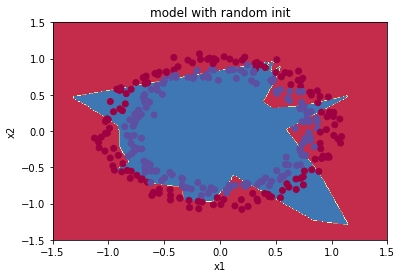

In [49]:
plt.title("model with random init")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(params,x.T),train_X,train_Y)

### 可见随机初始化可能产生梯度消失或者爆炸，算法速度较慢，权重初始化较大时效果不好

### (3)抑梯度异常初始化（/np.sqrt(2/上层维度)）

In [50]:
def init_he(layers_dims):
    """抑梯度异常初始化"""
    np.random.seed(1)
    params = {}
    L = len(layers_dims)
    
    for l in range(1,L):
        params["W" + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2 / layers_dims[l-1])
        params["b" + str(l)] = np.zeros((layers_dims[l],1))
        
    return params

In [51]:
# 测试抑梯度异常初始化
params = init_he([2,4,1])
params["W1"],params["b1"],params["W2"],params["b2"]

(array([[ 1.62434536, -0.61175641],
        [-0.52817175, -1.07296862],
        [ 0.86540763, -2.3015387 ],
        [ 1.74481176, -0.7612069 ]]),
 array([[0.],
        [0.],
        [0.],
        [0.]]),
 array([[ 0.22559471, -0.17633148,  1.03386644, -1.45673947]]),
 array([[0.]]))

迭代0次，误差为0.706354
迭代1000次，误差为0.684167
迭代2000次，误差为0.674301
迭代3000次，误差为0.659983
迭代4000次，误差为0.626547
迭代5000次，误差为0.569667
迭代6000次，误差为0.485241
迭代7000次，误差为0.383805
迭代8000次，误差为0.293448
迭代9000次，误差为0.227764
迭代10000次，误差为0.183286
迭代11000次，误差为0.153430
迭代12000次，误差为0.134161
迭代13000次，误差为0.119932
迭代14000次，误差为0.093236


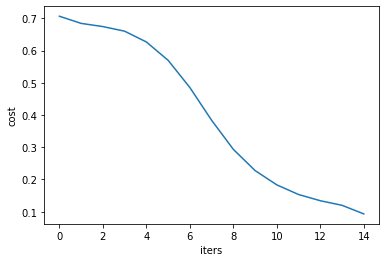

In [52]:
params = model(train_X,train_Y,initialization="he")

In [53]:
pre_train = init_utils.predict(train_X,train_Y,params)
pre_test = init_utils.predict(test_X,test_Y,params)

Accuracy: 0.98
Accuracy: 0.94


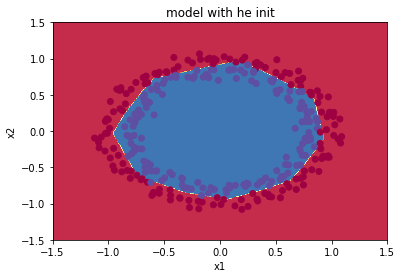

In [54]:
plt.title("model with he init")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
init_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(params,x.T),train_X,train_Y)

### 可见抑梯度异常初始化的效果非常显著

### 总结：
### 1.不同初始化方法可能导致不同结果
###            2.随机初始化有助于打破对称，使得不同隐藏层学习到不同参数
###            3.初始化时，权重的初始值不宜过大
###           4.he初始化搭配ReLU激活函数一般能得到不错的效果

## 2-正则化
### 分别采用无正则化，L2正则化和dropout正则化改善模型

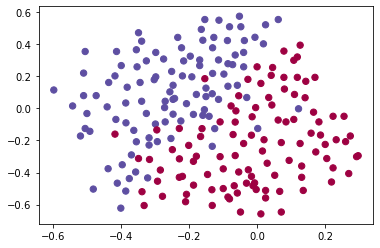

In [55]:
train_X,train_Y,test_X,test_Y = reg_utils.load_2D_dataset(is_plot=True)

In [60]:
def model1(X,Y,a=0.3,iters=30000,isPrint=True,isPlot=True,lambd=0,keep_prob=1):
    """神经网络模型"""
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0],20,3,1]
    params = reg_utils.initialize_parameters(layers_dims)
        
    for i in range(0,iters):
        # 前向传播
        if keep_prob == 1: # 无dropout
            a3, cache = reg_utils.forward_propagation(X,params)
            
        elif keep_prob < 1: # dropout
            a3, cache = forward_propagation_with_dropout(X,params,keep_prob)
        
        else:
            print("参数错误")
            exit
            
        # 计算损失函数
        if lambd == 0: # 无L2正则化
            cost = reg_utils.compute_cost(a3,Y)
            
        else:
            cost = compute_L2cost(a3,Y,params,lambd)
            
        # 反向传播
        if lambd == 0 and keep_prob == 1:
            grads = reg_utils.backward_propagation(X,Y,cache)
        
        elif lambd != 0:
            grads = bp_with_L2(X,Y,cache,lambd)
            
        elif keep_prob != 1:
            grads = bp_with_dropout(X,Y,cache,keep_prob)
            
        # 参数更新
        params = reg_utils.update_parameters(params,grads,a)
        
        if i % 1000 == 0:
            costs.append(cost)
            if isPrint:
                print("迭代%d次，误差为%f" % (i,cost))
                
    if isPlot:
        plt.plot(costs)
        plt.xlabel('iters')
        plt.ylabel('cost')
        plt.show()
            
    return params

### (1)无正则化

迭代0次，误差为0.655741
迭代1000次，误差为0.222267
迭代2000次，误差为0.202887
迭代3000次，误差为0.182515
迭代4000次，误差为0.180540
迭代5000次，误差为0.176205
迭代6000次，误差为0.168327
迭代7000次，误差为0.165836
迭代8000次，误差为0.163127
迭代9000次，误差为0.159426
迭代10000次，误差为0.163300
迭代11000次，误差为0.160986
迭代12000次，误差为0.157645
迭代13000次，误差为0.152136
迭代14000次，误差为0.148437
迭代15000次，误差为0.147964
迭代16000次，误差为0.146349
迭代17000次，误差为0.146344
迭代18000次，误差为0.143351
迭代19000次，误差为0.139365
迭代20000次，误差为0.138516
迭代21000次，误差为0.141187
迭代22000次，误差为0.136293
迭代23000次，误差为0.131519
迭代24000次，误差为0.130323
迭代25000次，误差为0.132854
迭代26000次，误差为0.128148
迭代27000次，误差为0.132638
迭代28000次，误差为0.126784
迭代29000次，误差为0.124088


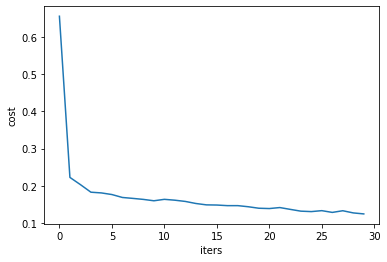

In [57]:
params = model1(train_X,train_Y)

In [58]:
pre_train = reg_utils.predict(train_X,train_Y,params)
pre_test = reg_utils.predict(test_X,test_Y,params)

Accuracy: 0.9478672985781991
Accuracy: 0.915


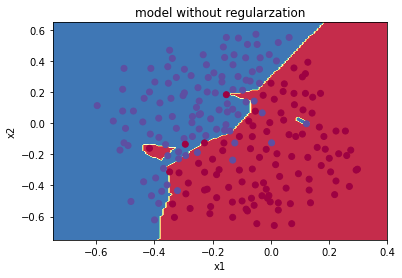

In [59]:
plt.title("model without regularzation")
axes = plt.gca()
axes.set_xlim([-0.75,0.4])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(params,x.T),train_X,train_Y)

### 可见在无正则化时决策边界出现明显过拟合

### (2)L2正则化

In [62]:
def compute_L2cost(a3,Y,params,lambd):
    """L2正则化损失函数"""
    m = Y.shape[1]
    W1 = params["W1"]
    W2 = params["W2"]
    W3 = params["W3"]
    
    cost_orig = reg_utils.compute_cost(a3,Y)
    
    cost_L2 = lambd * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3))) / (2 * m)
    
    cost = cost_orig + cost_L2
    
    return cost

In [65]:
def bp_with_L2(X,Y,cache,lambd):
    """L2正则化后的反向传播"""
    m = X.shape[1]
    (Z1,A1,W1,b1,Z2,A2,W2,b2,Z3,A3,W3,b3) = cache
    
    dZ3 = A3 - Y
    dW3 = dZ3 @ A2.T / m + lambd * W3 / m
    db3 = np.sum(dZ3,axis=1,keepdims=True) / m
    
    dA2 = W3.T @ dZ3
    dZ2 = np.multiply(dA2,np.int64(A2 > 0)) # 模拟ReLU梯度
    dW2 = dZ2 @ A1.T / m + lambd * W2 / m
    db2 = np.sum(dZ2,axis=1,keepdims=True) / m
    
    dA1 = W2.T @ dZ2
    dZ1 = np.multiply(dA1,np.int64(A1 > 0)) # 模拟ReLU梯度
    dW1 = dZ1 @ X.T / m + lambd * W1 / m
    db1 = np.sum(dZ1,axis=1,keepdims=True) / m
    
    grads = {"dZ3":dZ3,"dW3":dW3,"db3":db3,"dA2":dA2,
             "dZ2":dZ2,"dW2":dW2,"db2":db2,"dA1":dA1,
             "dZ1":dZ1,"dW1":dW1,"db1":db1
            }
    return grads

迭代0次，误差为0.697448
迭代1000次，误差为0.273046
迭代2000次，误差为0.269858
迭代3000次，误差为0.269508
迭代4000次，误差为0.269265
迭代5000次，误差为0.269043
迭代6000次，误差为0.268897
迭代7000次，误差为0.268775
迭代8000次，误差为0.268673
迭代9000次，误差为0.268560
迭代10000次，误差为0.268492
迭代11000次，误差为0.268414
迭代12000次，误差为0.268370
迭代13000次，误差为0.268318
迭代14000次，误差为0.268267
迭代15000次，误差为0.268220
迭代16000次，误差为0.268169
迭代17000次，误差为0.268152
迭代18000次，误差为0.268133
迭代19000次，误差为0.268089
迭代20000次，误差为0.268092
迭代21000次，误差为0.268038
迭代22000次，误差为0.268060
迭代23000次，误差为0.267829
迭代24000次，误差为0.267895
迭代25000次，误差为0.267943
迭代26000次，误差为0.267854
迭代27000次，误差为0.267916
迭代28000次，误差为0.267895
迭代29000次，误差为0.267826


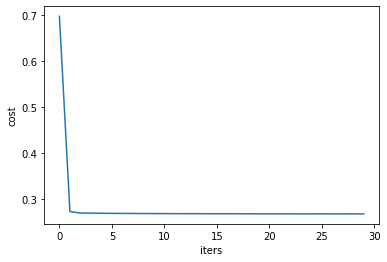

In [66]:
params = model1(train_X,train_Y,lambd=0.7)

In [67]:
pre_train = reg_utils.predict(train_X,train_Y,params)
pre_test = reg_utils.predict(test_X,test_Y,params)

Accuracy: 0.9383886255924171
Accuracy: 0.93


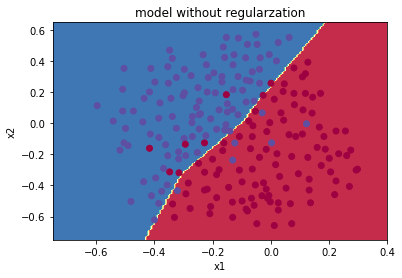

In [68]:
plt.title("model without regularzation")
axes = plt.gca()
axes.set_xlim([-0.75,0.4])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(params,x.T),train_X,train_Y)

### 可见L2正则化通过削减权重大小得到更平滑的模型，但需要更长的训练时间

### (3)dropout正则化

In [69]:
def forward_propagation_with_dropout(X,params,keep_prob):
    """dropout正则化的前向传播"""
    np.random.seed(1)
    
    W1,b1,W2,b2,W3,b3 = params["W1"],params["b1"],params["W2"],params["b2"],params["W3"],params["b3"],
    
    Z1 = W1 @ X + b1
    A1 = reg_utils.relu(Z1)
    D1 = np.random.rand(A1.shape[0],A1.shape[1])
    D1 = D1 < keep_prob
    A1 = A1 * D1 / keep_prob
    
    Z2 = W2 @ A1 + b2
    A2 = reg_utils.relu(Z2)
    D2 = np.random.rand(A2.shape[0],A2.shape[1])
    D2 = D2 < keep_prob
    A2 = A2 * D2 / keep_prob
    
    Z3 = W3 @ A2 + b3
    A3 = reg_utils.relu(Z3)
    
    cache = (Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3)
    
    return A3,cache

In [72]:
def bp_with_dropout(X,Y,cache,keep_prob):
    """dropout正则化的反向传播"""
    m = X.shape[1]
    (Z1,D1,A1,W1,b1,Z2,D2,A2,W2,b2,Z3,A3,W3,b3) = cache
    
    dZ3 = A3 - Y
    dW3 = dZ3 @ A2.T / m 
    db3 = np.sum(dZ3,axis=1,keepdims=True) / m
    
    dA2 = W3.T @ dZ3 * D2 / keep_prob
    dZ2 = np.multiply(dA2,np.int64(A2 > 0)) # 模拟ReLU梯度
    dW2 = dZ2 @ A1.T / m 
    db2 = np.sum(dZ2,axis=1,keepdims=True) / m
    
    dA1 = W2.T @ dZ2 * D1 / keep_prob
    dZ1 = np.multiply(dA1,np.int64(A1 > 0)) # 模拟ReLU梯度
    dW1 = dZ1 @ X.T / m 
    db1 = np.sum(dZ1,axis=1,keepdims=True) / m
    
    grads = {"dZ3":dZ3,"dW3":dW3,"db3":db3,"dA2":dA2,
             "dZ2":dZ2,"dW2":dW2,"db2":db2,"dA1":dA1,
             "dZ1":dZ1,"dW1":dW1,"db1":db1
            }
    return grads

C:\Users\Administrator\Desktop\DL_NG\2.改善深层神经网络\01-初始化、正则化和梯度校验\reg_utils.py:121: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\Administrator\Desktop\DL_NG\2.改善深层神经网络\01-初始化、正则化和梯度校验\reg_utils.py:121: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\Administrator\Desktop\DL_NG\2.改善深层神经网络\01-初始化、正则化和梯度校验\reg_utils.py:121: RuntimeWarning: invalid value encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


迭代0次，误差为inf
迭代1000次，误差为inf
迭代2000次，误差为0.176730
迭代3000次，误差为0.126176
迭代4000次，误差为0.113538
迭代5000次，误差为0.124946
迭代6000次，误差为0.127936
迭代7000次，误差为0.133612
迭代8000次，误差为0.118329
迭代9000次，误差为0.117807
迭代10000次，误差为0.122348
迭代11000次，误差为0.100852
迭代12000次，误差为0.092131
迭代13000次，误差为0.098196
迭代14000次，误差为0.102471
迭代15000次，误差为0.084588
迭代16000次，误差为0.081197
迭代17000次，误差为0.088091
迭代18000次，误差为0.078474
迭代19000次，误差为0.076346
迭代20000次，误差为0.076224
迭代21000次，误差为0.081947
迭代22000次，误差为0.093247
迭代23000次，误差为0.096197
迭代24000次，误差为0.088281
迭代25000次，误差为0.089904
迭代26000次，误差为0.099131
迭代27000次，误差为0.093042
迭代28000次，误差为0.084569
迭代29000次，误差为0.085566


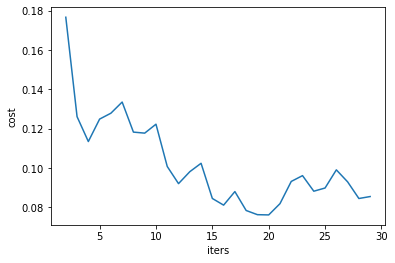

In [78]:
params = model1(train_X,train_Y,a=0.3,keep_prob=0.88)

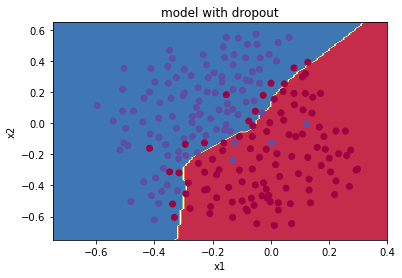

In [79]:
plt.title("model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.4])
axes.set_ylim([-0.75,0.65])
reg_utils.plot_decision_boundary(lambda x: init_utils.predict_dec(params,x.T),train_X,train_Y)

In [80]:
pre_train = reg_utils.predict(train_X,train_Y,params)
pre_test = reg_utils.predict(test_X,test_Y,params)

Accuracy: 0.9004739336492891
Accuracy: 0.935


## 3-梯度校验